# <center>Analyzing a Horse Racing Dataset</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand

%matplotlib inline

#Supresses scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(pd.__version__)

1.1.3


## This is the 'Horses for Courses' Kaggle dataset

In [3]:
fields = ["position_again","bf_odds","venue_name","date","market_name","condition",
          "barrier","blinkers","emergency","handicap_weight","last_twenty_starts",
          "prize_money","sex","age","jockey_sex","days_since_last_run","overall_starts",
          "overall_wins","overall_places","track_starts","track_wins","track_places",
          "firm_starts","firm_wins","firm_places","good_starts","good_wins","good_places",
          "slow_starts","slow_wins","slow_places","soft_starts","soft_wins",
          "soft_places","heavy_starts","heavy_wins","heavy_places","distance_starts",
          "distance_wins","distance_places","name","race_number"] 

df = pd.read_csv("horses.csv",
                 usecols=fields, 
                 skipinitialspace=True, 
                 low_memory=False)

df.head()

,position_again,bf_odds,venue_name,date,market_name,race_number,condition,name,barrier,blinkers,emergency,handicap_weight,prize_money,sex,age,jockey_sex,last_twenty_starts,days_since_last_run,overall_starts,overall_wins,overall_places,track_starts,track_wins,track_places,firm_starts,firm_wins,firm_places,good_starts,good_wins,good_places,slow_starts,slow_wins,slow_places,soft_starts,soft_wins,soft_places,heavy_starts,heavy_wins,heavy_places,distance_starts,distance_wins,distance_places
0,1.00,2.88,Echuca,2016-06-27,R3 1200m Mdn,3,HVY9,CORONATION LANCE,3.00,False,False,58.50,2160.00,Gelding,3.00,Male,f3,14.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
1,2.00,15.00,Echuca,2016-06-27,R3 1200m Mdn,3,HVY9,THUNDER GUN,10.00,False,False,58.50,21175.00,Gelding,5.00,Male,f0x6x80x2,39.00,5.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,1.00,2.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00
2,3.00,95.00,Echuca,2016-06-27,R3 1200m Mdn,3,HVY9,JUST LEAVE,6.00,False,False,56.50,28855.00,Mare,6.00,Male,f68477579x00,15.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,1.00,0.00,0.00,5.00,0.00,0.00,3.00,0.00,0.00,4.00,0.00,0.00
3,nan,20.00,Echuca,2016-06-27,R3 1200m Mdn,3,HVY9,ONYA SKATES KATE,2.00,False,False,56.50,1475.00,Filly,3.00,Male,f0,15.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,nan,2.74,Echuca,2016-06-27,R3 1200m Mdn,3,HVY9,DISSEMINATE,7.00,False,False,56.50,1215.00,Filly,3.00,Male,f4x,173.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


### I decided not to use any 'man-made' metrics (e.g. odds, field strength, etc.) because these are relative and some are subject to change in the moments before the race. For instance, if the model includes odds and a customer is using the model API, they would get different results for the same race depending on when they ran the model because the odds change regularly.

### Also, jockey and trainer win percentages are not included with this dataset. I attempted to include it, but I could not find enough data.

## Feature info:

In [4]:
df.dtypes

position_again         float64
bf_odds                float64
venue_name              object
date                    object
market_name             object
race_number              int64
condition               object
name                    object
barrier                float64
blinkers                object
emergency               object
handicap_weight        float64
prize_money            float64
sex                     object
age                    float64
jockey_sex              object
last_twenty_starts      object
days_since_last_run    float64
overall_starts         float64
overall_wins           float64
overall_places         float64
track_starts           float64
track_wins             float64
track_places           float64
firm_starts            float64
firm_wins              float64
firm_places            float64
good_starts            float64
good_wins              float64
good_places            float64
slow_starts            float64
slow_wins              float64
slow_pla

In [5]:
df.isna().sum()

position_again         158461
bf_odds                     0
venue_name                  0
date                        0
market_name                 0
race_number                 0
condition               22188
name                        0
barrier                 26289
blinkers                26289
emergency               26289
handicap_weight         26289
prize_money             26791
sex                     26791
age                     26791
jockey_sex              26791
last_twenty_starts      37644
days_since_last_run     27042
overall_starts          27042
overall_wins            27042
overall_places          27042
track_starts            27042
track_wins              27042
track_places            27042
firm_starts             27042
firm_wins               27042
firm_places             27042
good_starts             27042
good_wins               27042
good_places             27042
slow_starts             27042
slow_wins               27042
slow_places             27042
soft_start

In [6]:
df.describe()

,position_again,bf_odds,race_number,barrier,handicap_weight,prize_money,age,days_since_last_run,overall_starts,overall_wins,overall_places,track_starts,track_wins,track_places,firm_starts,firm_wins,firm_places,good_starts,good_wins,good_places,slow_starts,slow_wins,slow_places,soft_starts,soft_wins,soft_places,heavy_starts,heavy_wins,heavy_places,distance_starts,distance_wins,distance_places
count,63219.00,221680.00,221680.00,195391.00,195391.00,194889.00,194889.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00,194638.00
mean,1.95,36.46,4.59,5.83,56.90,68885.22,4.61,32.32,16.50,2.09,4.04,2.56,0.36,0.68,0.21,0.03,0.05,11.38,1.43,2.77,1.96,0.25,0.48,3.62,0.45,0.88,1.31,0.18,0.34,7.00,1.03,1.83
std,0.81,61.37,2.33,3.38,2.19,164408.16,1.59,46.53,16.11,2.44,4.49,4.56,0.90,1.49,0.71,0.19,0.28,11.58,1.89,3.33,2.52,0.58,0.90,4.09,0.83,1.34,2.12,0.53,0.78,8.48,1.55,2.61
min,1.00,1.10,1.00,1.00,5.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,7.00,3.00,3.00,55.00,9025.00,3.00,12.00,5.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,2.00,14.50,5.00,6.00,57.00,32900.00,4.00,16.00,12.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,8.00,1.00,2.00,1.00,0.00,0.00,2.00,0.00,0.00,1.00,0.00,0.00,4.00,0.00,1.00
75%,3.00,36.00,7.00,8.00,58.50,76560.00,6.00,24.00,23.00,3.00,6.00,3.00,0.00,1.00,0.00,0.00,0.00,16.00,2.00,4.00,3.00,0.00,1.00,5.00,1.00,1.00,2.00,0.00,0.00,10.00,1.00,3.00
max,5.00,1000.00,11.00,24.00,74.00,16563925.00,12.00,255.00,139.00,28.00,46.00,86.00,19.00,29.00,25.00,5.00,8.00,107.00,24.00,39.00,27.00,7.00,12.00,38.00,9.00,16.00,29.00,9.00,11.00,105.00,18.00,34.00


## Fixing the format of some features:

In [7]:
df.date = pd.to_datetime(df.date, format='%Y'+'-'+'%m'+'-'+'%d')

#removes numbers from end of 'condition' strings
df.condition = df.condition.str.replace('\d+', '')

#renaming 'condition' values so that they're uniform
df.condition.replace(['HVY','AWT'], ['HEAVY','GOOD'], inplace=True) 
#AWT equates to a Good surface under some weather conditions

In [8]:
df['blinkers'] = df['blinkers'].astype('bool')
df['emergency'] = df['emergency'].astype('bool')

## Useful cleaning functions for the visualizations below:

In [9]:
#Removes races where a chosen column has any null values or where all values are the same
def column_cleaner(cleaned_df, grouped_df, column_name):
    non_null_indices = grouped_df[column_name].apply(lambda x: all(x.notnull())).\
        where(lambda x: x==True).dropna().index
    non_null_df = cleaned_df[cleaned_df.index.isin(non_null_indices)]
    
    non_null_grouped = non_null_df.groupby(['date','venue_name','race_number','market_name'])
    clean_indices = non_null_grouped[column_name].value_counts(normalize=True,dropna=False).\
        where(lambda x:x != 1).dropna().index.droplevel(column_name)
    new_cleaned_df = non_null_df[non_null_df.index.isin(clean_indices)]
    return new_cleaned_df

#Separates off winners of each race
def cleaned_win_df(cleaned_df):
    win_indices = cleaned_df.position_again.apply(lambda x:x == 1)
    df_cleaned_win = cleaned_df[win_indices]
    return df_cleaned_win

## Feature engineering and cleaning:

### Creating a track distance column from market_name:

In [10]:
new = df.market_name.str.split(expand=True)

df['distance'] = new[1].str.rstrip('m').astype(np.int64)

df.distance.head()

0    1200
1    1200
2    1200
3    1200
4    1200
Name: distance, dtype: int64

### Creating general and track, distance, and condition-specific 'win_percent' and 'place_percent' columns:

In [11]:
#creates overall, track, and distance win_percent and place_percent columns
#and drops existing wins and places columns
columns_list = ['overall','track','distance']

for x in columns_list:
    df[x+'_win_percent'] = df[x+'_wins']/df[x+'_starts']
    
    df[x+'_place_percent'] = df[x+'_places']/df[x+'_starts']

In [12]:
#creates a condition_starts ,condition_win_percent, and condition_place_percent column
#for each horse according to the condition of the track for that race
df.loc[df.condition.isna(), 'condition_win_percent'] = np.nan
condition_list = ['firm','good','slow','soft','heavy']

for x in condition_list: 
    df.loc[df.condition.str.lower() == x, 'condition_starts'] = df[x+'_starts']
    df.loc[df.condition.str.lower() == x, 'condition_win_percent'] = df[x+'_wins']/df[x+'_starts']
    df.loc[df.condition.str.lower() == x, 'condition_place_percent'] = df[x+'_places']/df[x+'_starts']
    
# Replaces infinity (zero division) with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

### Splits last_twenty_starts column into 20 separate columns, replaces values, then drops last_twenty_starts:

In [13]:
new = pd.DataFrame()

for i in range(19,-1,-1):
    new[i] = df.last_twenty_starts.str[i]
    df['last_start'+str(i+1)] = new[i].replace(['0','','x','f'],['ten+','none','scratch','fell'])
    
df.drop('last_twenty_starts',axis=1,inplace=True)

#### Most horse racing websites only have last 10 starts, so I remove starts data beyond that:

In [14]:
#drops last_start 11 through 20 to match information provided on racing websites
for i in range(10,20):
    df.drop('last_start'+str(i+1),axis=1,inplace=True)

#### Percentage of horses that have had at least 1 through 10 starts:

In [15]:
start_list = ['last_start'+str(i+1) for i in range(10)]
df[start_list].count()/len(df)*100

last_start1    83.02
last_start2    83.02
last_start3    79.74
last_start4    76.43
last_start5    73.18
last_start6    69.85
last_start7    66.64
last_start8    63.50
last_start9    60.52
last_start10   57.64
dtype: float64

### Reindexing the dataframe:

In [16]:
df.set_index(['date','venue_name','race_number','market_name'], inplace=True)
df.sort_index(level=['date','venue_name','race_number'], inplace=True)

### Cleaning data by removing races with missing win and/or place values in 'position_again' column:

In [17]:
#position_again unique values
df.position_again.unique()

array([ 1.,  2.,  3., nan,  5.,  4.])

In [18]:
df_grouped = df.groupby(['date','venue_name','race_number','market_name'])

#Drops all races in 'position_again' column where sum of values [1st, 2nd, 3rd] don't add to 3 or 6
#i.e. 1+2 and 1+2+3
index_list1 = df_grouped.position_again.sum().where(lambda x:(x == 3) | (x == 6)).dropna().index
df_cleaned = df[df.index.isin(index_list1)]

df_grouped = df_cleaned.groupby(['date','venue_name','race_number','market_name'])

#Eliminates 'position_again' races where there are duplicate finishes (e.g. 1+1+1) or just one 3rd-place finish
index_list2 = df_grouped.position_again.value_counts(normalize=True,dropna=False)\
                .where(lambda x:x != 1).dropna().index.droplevel('position_again')
df_cleaned = df_cleaned[df_cleaned.index.isin(index_list2)]

df_grouped = df_cleaned.groupby(['date','venue_name','race_number','market_name'])

### Standardizing horses across each race:

In [19]:
from sklearn.preprocessing import minmax_scale
from scipy.stats import chisquare, ttest_ind, zscore

#### Creating a prize_money_per_start column:

##### This may be one of the best indicators, as prize money is also an indicator of the difficulty of past races. Therefore, the value (meaningfulness) of past wins is taken into consideration.

In [20]:
#creates prize_money_per_start column
df_cleaned['prize_money_per_start'] = df_cleaned.prize_money/df_cleaned.overall_starts

#### Creating race-relative normalizing features for numeric features:

In [21]:
df_cleaned['prize_money_per_start_z'] = df_grouped['prize_money_per_start'].transform(lambda x: zscore(x))

df_grouped = df_cleaned.groupby(['date','venue_name','race_number','market_name'])

In [22]:
scaler_cols = ['handicap_weight','days_since_last_run','overall_win_percent','overall_place_percent',
                'distance_win_percent','distance_place_percent','condition_win_percent','age',
                'condition_place_percent','overall_starts','distance_starts','condition_starts',
                'track_starts']

for col in scaler_cols:
    df_cleaned[col+'_norm'] = df_grouped[col].transform(lambda x: minmax_scale(x))
    df_cleaned[col+'_z'] = df_grouped[col].transform(lambda x: zscore(x))

In [23]:
#Replaces infinity (from zero division) with NaN
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

df_cleaned.fillna(np.nan,inplace=True)

df_grouped = df_cleaned.groupby(['date','venue_name','race_number','market_name'])

df_cleaned.head()

position_again  bf_odds  \
date       venue_name race_number market_name                             
2016-06-27 Echuca     3           R3 1200m Mdn            1.00     2.88   
                                  R3 1200m Mdn            2.00    15.00   
                                  R3 1200m Mdn            3.00    95.00   
                                  R3 1200m Mdn             nan    20.00   
                                  R3 1200m Mdn             nan     2.74   

                                               condition              name  \
date       venue_name race_number market_name                                
2016-06-27 Echuca     3           R3 1200m Mdn     HEAVY  CORONATION LANCE   
                                  R3 1200m Mdn     HEAVY       THUNDER GUN   
                                  R3 1200m Mdn     HEAVY        JUST LEAVE   
                                  R3 1200m Mdn     HEAVY  ONYA SKATES KATE   
                                  R3 1200m Mdn     HEAVY       DISSEMINATE   

                                                barrier  blinkers  emergency  \
date       venue_name race_number market_name                                  
2016-06-27 Echuca     3           R3 1200m Mdn     3.00     False      False   
                                  R3 1200m Mdn    10.00     False      False   
                                  R3 1200m Mdn     6.00     False      False   
                                  R3 1200m Mdn     2.00     False      False   
                                  R3 1200m Mdn     7.00     False      False   

                                                handicap_weight  prize_money  \
date       venue_name race_number market_name                                  
2016-06-27 Echuca     3           R3 1200m Mdn            58.50      2160.00   
                                  R3 1200m Mdn            58.50     21175.00   
                                  R3 1200m Mdn            56.50     28855.00   
                                  R3 1200m Mdn            56.50      1475.00   
                                  R3 1200m Mdn            56.50      1215.00   

                                                    sex  age jockey_sex  \
date       venue_name race_number market_name                             
2016-06-27 Echuca     3           R3 1200m Mdn  Gelding 3.00       Male   
                                  R3 1200m Mdn  Gelding 5.00       Male   
                                  R3 1200m Mdn     Mare 6.00       Male   
                                  R3 1200m Mdn    Filly 3.00       Male   
                                  R3 1200m Mdn    Filly 3.00       Male   

                                                days_since_last_run  \
date       venue_name race_number market_name                         
2016-06-27 Echuca     3           R3 1200m Mdn                14.00   
                                  R3 1200m Mdn                39.00   
                                  R3 1200m Mdn                15.00   
                                  R3 1200m Mdn                15.00   
                                  R3 1200m Mdn               173.00   

                                                overall_starts  overall_wins  \
date       venue_name race_number market_name                                  
2016-06-27 Echuca     3           R3 1200m Mdn            1.00          0.00   
                                  R3 1200m Mdn            5.00          0.00   
                                  R3 1200m Mdn           10.00          0.00   
                                  R3 1200m Mdn            1.00          0.00   
                                  R3 1200m Mdn            1.00          0.00   

                                                overall_places  track_starts  \
date       venue_name race_number market_name                                  
2016-06-27 Echuca     3           R3 1200m Mdn            1.00          0.00   
                            

### Cleaned Dataframe Details:

In [24]:
print('Shape (rows,columns):', df_cleaned.shape)
print('Number of uncleaned races in original dataframe:',len(df.groupby(['date','venue_name',
                                                                         'race_number','market_name'])))
print('Number of remaining cleaned races:',len(df_grouped))

Shape (rows,columns): (218917, 85)
Number of uncleaned races in original dataframe: 22407
Number of remaining cleaned races: 22129


## Graphing the feature distributions:

In [25]:
number_list = df_cleaned.select_dtypes(include=np.number).columns.tolist()
number_list.remove('position_again')
print('Number of numeric features:',len(number_list))

Number of numeric features: 68


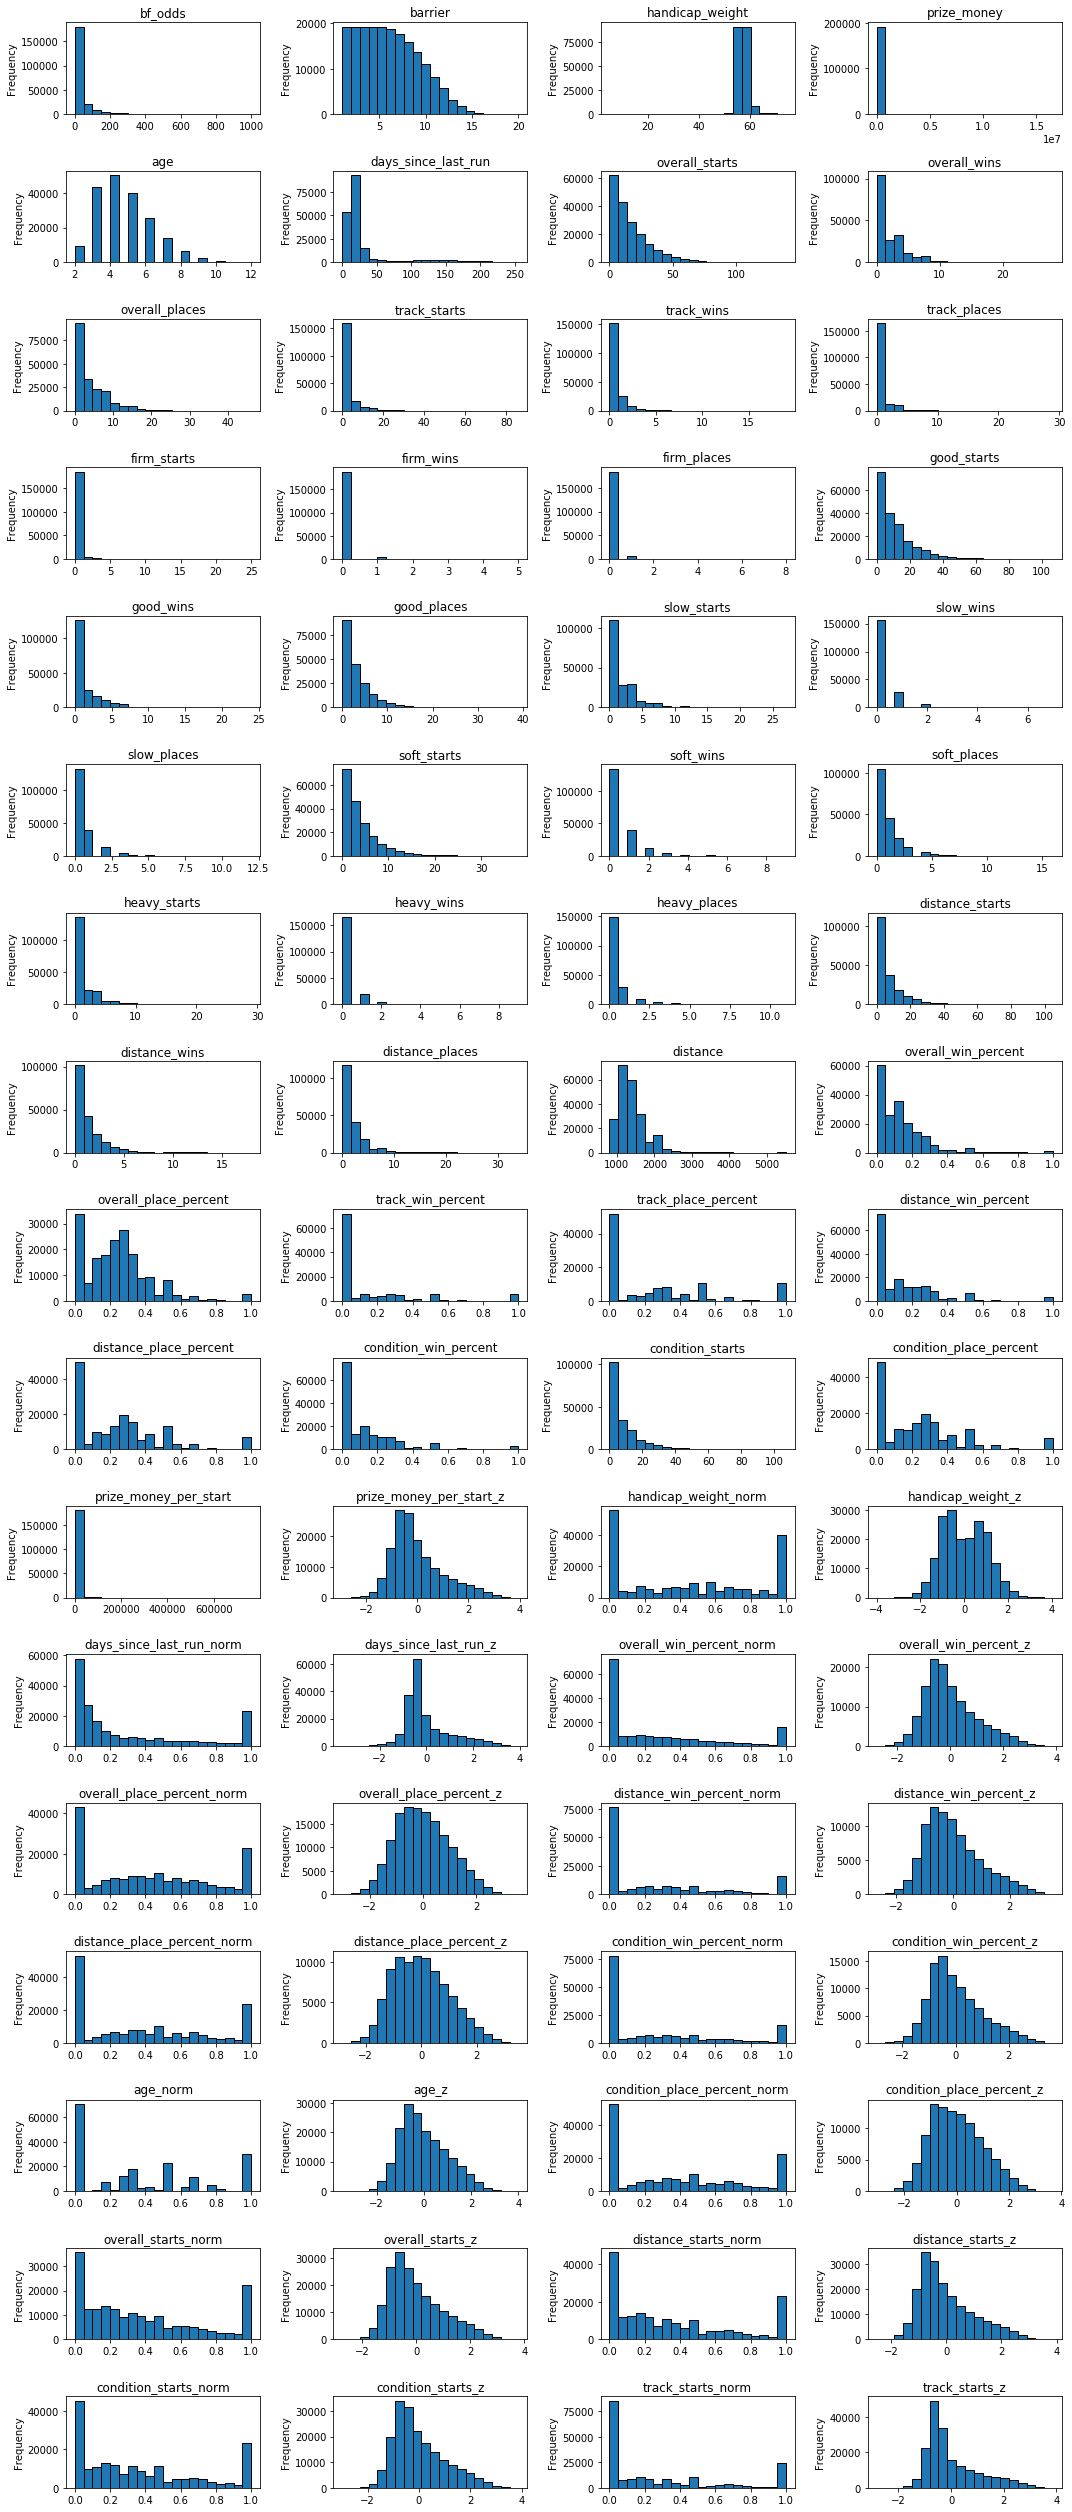

In [26]:
fig,ax = plt.subplots(17, 4)

m=0
for i in range(17):
    for j in range(4):
        df_cleaned[number_list[m]].plot(kind='hist',bins=20,ax=ax[i,j],figsize=(15,35),
                                        edgecolor='k').set_title(number_list[m])
        m+=1
        
plt.tight_layout()

### Features that are primarily NaN:

In [27]:
df_cleaned.isnull().sum().where(df_cleaned.isnull().sum() > .5 * df_cleaned.shape[0]).dropna()
# The position_again is primarily nan values because it only shows first and place.

position_again              156121.00
distance_win_percent_z      130146.00
distance_place_percent_z    126568.00
condition_win_percent_z     121757.00
condition_place_percent_z   112404.00
dtype: float64

## Visualisations and hypothesis tests of various features:

### For horse gender:

In [28]:
#Removes races where only one horse gender is represented
sex_pop_cleaned = column_cleaner(df_cleaned, df_grouped, 'sex')
sex_pop_cleaned_win = cleaned_win_df(sex_pop_cleaned)

In [29]:
#General percentage of horse genders for races where multiple genders are represented  
sex_pop_cleaned.sex.value_counts(dropna=False,normalize=True).sort_values(ascending=False).drop('Unknown')

Gelding   0.57
Mare      0.27
Filly     0.13
Colt      0.03
Horse     0.01
Name: sex, dtype: float64

In [30]:
sex_pop_cleaned_win.sex.value_counts(dropna=False,normalize=True).sort_values(ascending=False).drop('Unknown')

Gelding   0.57
Mare      0.24
Filly     0.14
Colt      0.04
Horse     0.01
Name: sex, dtype: float64

In [31]:
horse_sex_pop = sex_pop_cleaned.sex.value_counts(dropna=False,normalize=True)\
    .sort_values(ascending=False).drop('Unknown')
horse_sex_win = sex_pop_cleaned_win.sex.value_counts(dropna=False,normalize=True)\
    .sort_values(ascending=False).drop('Unknown')
horse_sex_percent_difference = (horse_sex_win - horse_sex_pop)/horse_sex_pop
horse_sex_percent_difference

Gelding    0.00
Mare      -0.11
Filly      0.10
Colt       0.49
Horse      0.16
Name: sex, dtype: float64

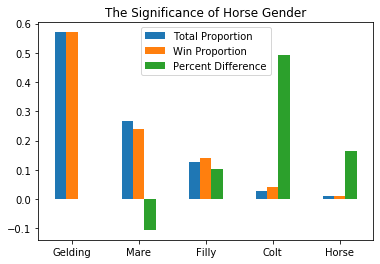

In [32]:
index1 = ['Gelding','Mare','Filly','Colt','Horse']
df1 = pd.DataFrame({'Total Proportion': horse_sex_pop,'Win Proportion': horse_sex_win,
                    'Percent Difference': horse_sex_percent_difference}, index=index1)
ax = df1.plot.bar(rot=0,title='The Significance of Horse Gender')

### Using the Pearson's chi-squared, I find horse gender is significant:

In [33]:
observed1 = sex_pop_cleaned_win.sex.value_counts().sort_values(ascending=False).drop('Unknown').values

expected_percentages1 = horse_sex_pop.values
expected1 = [x*observed1.sum() for x in expected_percentages1]

test_stat1, p_value1 = chisquare(observed1, expected1)
test_stat1, p_value1

(196.1115393313328, 2.575135537285537e-41)

### For horse age_z (z-scores):

In [34]:
#Removing races where there is only one age
age_pop_cleaned = column_cleaner(df_cleaned, df_grouped, 'age_z')

age_pop_cleaned_win = cleaned_win_df(age_pop_cleaned)

In [35]:
age_pop_cleaned.age_z.describe()

count   173884.00
mean         0.00
std          1.00
min         -3.46
25%         -0.75
50%         -0.18
75%          0.67
max          4.00
Name: age_z, dtype: float64

In [36]:
age_pop_cleaned_win.age_z.describe()

count   17426.00
mean       -0.25
std         0.93
min        -3.46
25%        -0.90
50%        -0.44
75%         0.32
max         3.74
Name: age_z, dtype: float64

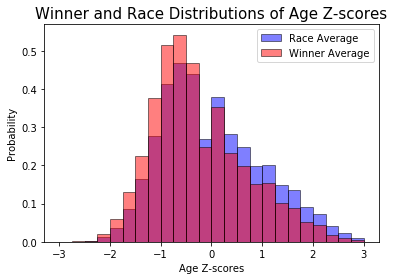

In [37]:
data2a = age_pop_cleaned.age_z.dropna().values
data2b = age_pop_cleaned_win.age_z.dropna().values

plt.title('Winner and Race Distributions of Age Z-scores', fontsize=15)
plt.hist(data2a, density=True, bins=24, range=(-3,3), label='Race Average', 
         color='b', alpha=.5, edgecolor='k')
plt.hist(data2b, density=True, bins=24, range=(-3,3), label='Winner Average',
         color='r', alpha=.5, edgecolor='k')
plt.legend(loc='upper right')
plt.xlabel('Age Z-scores')
plt.ylabel('Probability');

#### Using a 2-sample T-test, I find that Age Z-scores is significant:

In [38]:
test_stat2, p_value2 = ttest_ind(data2a, data2b)
test_stat2, p_value2

(31.656215012322114, 2.3090011035516106e-219)

#### Does condition affect the win distribution of age? Specifically, do older horses perform worse in bad conditions?

In [39]:
condit_age_pop = age_pop_cleaned[age_pop_cleaned.condition == 'HEAVY']

In [40]:
condit_age_pop_win = cleaned_win_df(condit_age_pop)

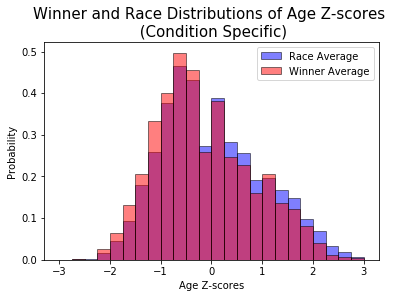

In [41]:
data2c = condit_age_pop.age_z.dropna().values
data2d = condit_age_pop_win.age_z.dropna().values

plt.title('Winner and Race Distributions of Age Z-scores \n (Condition Specific)', fontsize=15)
plt.hist(data2c, density=True, bins=24, range=(-3,3), label='Race Average', 
         color='b', alpha=.5, edgecolor='k')
plt.hist(data2d, density=True, bins=24, range=(-3,3), label='Winner Average',
         color='r', alpha=.5, edgecolor='k')

plt.legend(loc='upper right')
plt.xlabel('Age Z-scores')
plt.ylabel('Probability');

#### Condition depended T-test for Age Z-scores: 

In [42]:
test_stat2, p_value2 = ttest_ind(data2c, data2d)
test_stat2, p_value2

(6.353063627142515, 2.156108041954151e-10)

#### It appears as though bad track conditions actually level out the age discrepancies, maybe because they have more experience with those bad conditions.

### For horse handicap handicap_weight_z (z-scores):

In [43]:
#Removing races where there is only one weight
weight_pop_cleaned = column_cleaner(df_cleaned, df_grouped, 'handicap_weight_z')
weight_pop_cleaned_win = cleaned_win_df(weight_pop_cleaned)

In [44]:
weight_pop_cleaned.handicap_weight_z.describe()

count   188779.00
mean        -0.00
std          1.00
min         -4.00
25%         -0.79
50%         -0.06
75%          0.78
max          4.07
Name: handicap_weight_z, dtype: float64

In [45]:
weight_pop_cleaned_win.handicap_weight_z.describe()

count   19066.00
mean        0.22
std         1.00
min        -4.00
25%        -0.60
50%         0.28
75%         0.96
max         3.65
Name: handicap_weight_z, dtype: float64

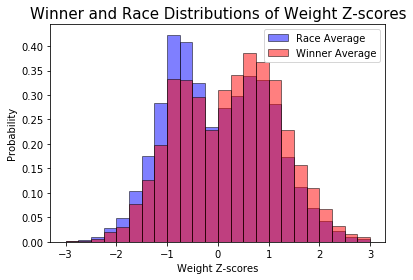

In [46]:
data3a = weight_pop_cleaned.handicap_weight_z.dropna().values
data3b = weight_pop_cleaned_win.handicap_weight_z.dropna().values

plt.title('Winner and Race Distributions of Weight Z-scores', fontsize=15)
plt.hist(data3a, density=True, bins=24, range=(-3,3), label='Race Average', 
         color='b', alpha=.5, edgecolor='k')
plt.hist(data3b, density=True, bins=24, range=(-3,3), label='Winner Average',
         color='r', alpha=.5, edgecolor='k')
plt.legend(loc='upper right')
plt.xlabel('Weight Z-scores')
plt.ylabel('Probability');

#### Using a 2-sample T-test, again I find that Weight Z-scores is significant:

In [47]:
test_stat3, p_value3 = ttest_ind(data3a, data3b)
test_stat3, p_value3

(-28.95386205950619, 5.841528141443628e-184)

### For prize money, using prize_money_per_start_z (z-scores):

In [48]:
money_pop_cleaned = column_cleaner(df_cleaned, df_grouped, 'prize_money_per_start_z')
money_pop_cleaned_win = cleaned_win_df(weight_pop_cleaned)

In [49]:
money_pop_cleaned.prize_money_per_start_z.describe()

count   150815.00
mean         0.00
std          1.00
min         -2.93
25%         -0.70
50%         -0.26
75%          0.52
max          3.95
Name: prize_money_per_start_z, dtype: float64

In [50]:
#Winner prize money 
money_pop_cleaned_win.prize_money_per_start_z.describe()

count   15191.00
mean        0.66
std         1.10
min        -2.27
25%        -0.23
50%         0.49
75%         1.48
max         3.94
Name: prize_money_per_start_z, dtype: float64

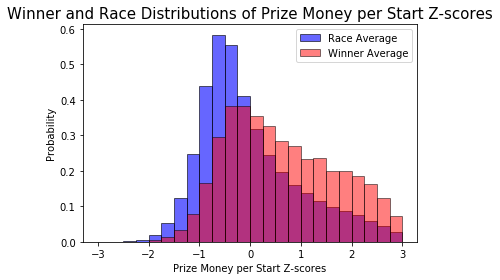

In [51]:
data4a = money_pop_cleaned.prize_money_per_start_z.dropna().values
data4b = money_pop_cleaned_win.prize_money_per_start_z.dropna().values

plt.title('Winner and Race Distributions of Prize Money per Start Z-scores',
          fontsize=15)
plt.hist(data4a, density=True, bins=24, range=(-3,3), label='Race Average',
         color='b', alpha=.6, edgecolor='k')
plt.hist(data4b, density=True, bins=24, range=(-3,3), label='Winner Average',
         color='r', alpha=.5, edgecolor='k')
plt.legend(loc='upper right')
plt.xlabel('Prize Money per Start Z-scores')
plt.ylabel('Probability');

#### Using a 2-sample T-test, I find that Prize Money per Start Z-scores is significant:


In [52]:
test_stat4, p_value4 = ttest_ind(data4a, data4b)
test_stat4, p_value4

(-76.59890810020039, 0.0)

### For overall wins:

In [53]:
overall_win_pop_cleaned = column_cleaner(df_cleaned, df_grouped, 'overall_win_percent_z')
overall_win_pop_cleaned_win = cleaned_win_df(overall_win_pop_cleaned)

In [54]:
overall_win_pop_cleaned.overall_win_percent_z.describe()

count   129633.00
mean         0.00
std          1.00
min         -2.78
25%         -0.70
50%         -0.22
75%          0.56
max          3.87
Name: overall_win_percent_z, dtype: float64

In [55]:
overall_win_pop_cleaned_win.overall_win_percent_z.describe()

count   13162.00
mean        0.33
std         1.08
min        -2.78
25%        -0.49
50%         0.14
75%         1.07
max         3.71
Name: overall_win_percent_z, dtype: float64

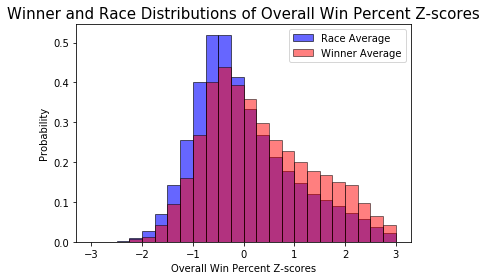

In [56]:
data5a = overall_win_pop_cleaned.overall_win_percent_z.dropna().values
data5b = overall_win_pop_cleaned_win.overall_win_percent_z.dropna().values

plt.title('Winner and Race Distributions of Overall Win Percent Z-scores',
          fontsize=15)
plt.hist(data5a, density=True, bins=24, range=(-3,3), label='Race Average',
         color='b', alpha=.6, edgecolor='k')
plt.hist(data5b, density=True, bins=24, range=(-3,3), label='Winner Average',
         color='r', alpha=.5, edgecolor='k')
plt.legend(loc='upper right')
plt.xlabel('Overall Win Percent Z-scores')
plt.ylabel('Probability');

#### Using a 2-sample T-test, I find that Overall Win Percent Z-scores is significant:

In [57]:
test_stat5, p_value5 = ttest_ind(data5a, data5b)
test_stat5, p_value5

(-35.74853195276411, 1.2015994615108988e-278)

#### There is high variance in the 100% column (aka beginner's luck). How many races before the 100% column is properly represented? That is, how many races is considered statistically significant?

#### It seems that a minimum of 5 races for all horses in the race gives the percent difference bar graph an exponential appearance. The other Github file has the graph showing this behavior.

In [58]:
overall_win_pop_grouped = overall_win_pop_cleaned.groupby(['date','venue_name','race_number','market_name'])
overall_starts_indices = overall_win_pop_grouped.overall_starts.agg('min').where(lambda x:x >= 5).dropna().index
overall_starts_cleaned = overall_win_pop_cleaned[overall_win_pop_cleaned.index.isin(overall_starts_indices)]
overall_starts_cleaned_win = cleaned_win_df(overall_starts_cleaned)

In [59]:
overall_starts_cleaned.overall_win_percent_z.describe()

count   85596.00
mean        0.00
std         1.00
min        -2.78
25%        -0.73
50%        -0.16
75%         0.63
max         3.53
Name: overall_win_percent_z, dtype: float64

In [60]:
overall_starts_cleaned_win.overall_win_percent_z.describe()

count   8804.00
mean       0.32
std        1.06
min       -2.78
25%       -0.49
50%        0.19
75%        1.07
max        3.53
Name: overall_win_percent_z, dtype: float64

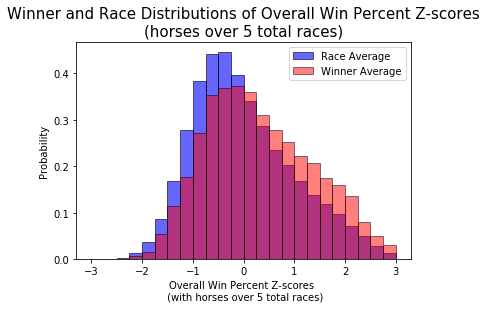

In [61]:
data6a = overall_starts_cleaned.overall_win_percent_z.dropna().values
data6b = overall_starts_cleaned_win.overall_win_percent_z.dropna().values

plt.title('Winner and Race Distributions of Overall Win Percent Z-scores\n(horses over 5 total races)',
          fontsize=15)
plt.hist(data6a, density=True, bins=24, range=(-3,3), label='Race Average',
         color='b', alpha=.6, edgecolor='k')
plt.hist(data6b, density=True, bins=24, range=(-3,3), label='Winner Average',
         color='r', alpha=.5, edgecolor='k')
plt.legend(loc='upper right')
plt.xlabel('Overall Win Percent Z-scores \n (with horses over 5 total races)')
plt.ylabel('Probability');

#### Using a 2-sample T-test, I find that Overall Win Percent Z-scores (with horses over 5 total races) is significant:

In [62]:
test_stat6, p_value6 = ttest_ind(data6a, data6b)
test_stat6, p_value6

(-28.167915579509863, 7.621487216692447e-174)

### For Barrier:

In [63]:
barrier_pop_cleaned = column_cleaner(df_cleaned, df_grouped, 'barrier')
barrier_grouped = barrier_pop_cleaned.groupby(['date','venue_name','race_number','market_name'])
barrier_indices = barrier_grouped.barrier.value_counts().where(lambda x:x == 1).dropna().index.droplevel('barrier')
barrier_pop_cleaned = barrier_pop_cleaned[barrier_pop_cleaned.index.isin(barrier_indices)]
barrier_pop_cleaned_win = cleaned_win_df(barrier_pop_cleaned)

In [64]:
barrier_pop = barrier_pop_cleaned.barrier.value_counts(normalize=True).sort_index().drop([18.00,19.00,20.00])
barrier_win = barrier_pop_cleaned_win.barrier.value_counts(normalize=True).sort_index().drop(18.00)
barrier_percent_difference = (barrier_win - barrier_pop)/barrier_pop
barrier_percent_difference

1.00     0.22
2.00     0.03
3.00     0.05
4.00     0.10
5.00     0.12
6.00     0.09
7.00    -0.04
8.00    -0.12
9.00    -0.13
10.00   -0.20
11.00   -0.23
12.00   -0.23
13.00   -0.39
14.00   -0.39
15.00   -0.18
16.00   -0.44
17.00   -0.16
Name: barrier, dtype: float64

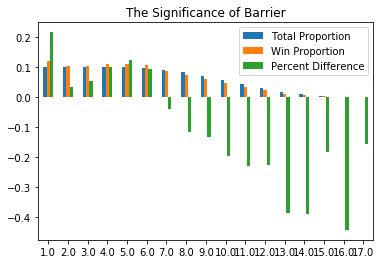

In [65]:
index7 = barrier_percent_difference.index
df7 = pd.DataFrame({'Total Proportion': barrier_pop,'Win Proportion': barrier_win,
                    'Percent Difference': barrier_percent_difference}, index=index7)
ax = df7.plot.bar(rot=0, title='The Significance of Barrier')

#### Why is barrier 1 so overrepresented?

#### Using the Pearson's chi-squared test, I find that barrier is significant:

In [66]:
observed7 = barrier_pop_cleaned_win.barrier.value_counts().sort_index().drop(18.00).values
expected_percentages7 = barrier_pop.values
expected7 = [x*observed7.sum() for x in expected_percentages7]
test_stat7, p_value7 = chisquare(observed7, expected7)
test_stat7, p_value7

(412.7953152755308, 7.551757964292395e-78)

#### Does the length of a race negate or alter the effect of starting barrier?

In [67]:
barr_dist_indices = barrier_pop_cleaned.distance.where(lambda x:x>=1800).dropna().index
barr_dist_cleaned = barrier_pop_cleaned[barrier_pop_cleaned.index.isin(barr_dist_indices)]
barr_dist_cleaned_win = cleaned_win_df(barr_dist_cleaned)

In [68]:
barr_dist_pop = barr_dist_cleaned.barrier.value_counts(normalize=True).sort_index().drop(18.00)
barr_dist_win = barr_dist_cleaned_win.barrier.value_counts(normalize=True).sort_index().drop(18.00)
barr_dist_percent_difference = (barr_dist_win - barr_dist_pop)/barr_dist_pop
barr_dist_percent_difference

1.00     0.18
2.00     0.00
3.00     0.07
4.00     0.14
5.00     0.13
6.00     0.03
7.00     0.03
8.00    -0.03
9.00    -0.13
10.00   -0.26
11.00   -0.22
12.00   -0.36
13.00   -0.43
14.00   -0.35
15.00   -0.56
16.00   -0.82
17.00     nan
Name: barrier, dtype: float64

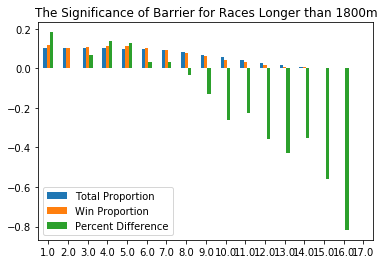

In [69]:
index7a = barr_dist_percent_difference.index
df7a = pd.DataFrame({'Total Proportion': barr_dist_pop,'Win Proportion': barr_dist_win,
                    'Percent Difference': barr_dist_percent_difference}, index=index7a)
ax = df7a.plot.bar(rot=0, title='The Significance of Barrier for Races Longer than 1800m')

#### There doesn't appear to be a dramatic difference for races longer than 1800m.

### For jockey gender: 

#### Overall percentage of men and women in races where both are represented:

In [70]:
#Drops races where there is only one jockey gender, meaning that the other gender can't win
jockey_sex_cleaned = column_cleaner(df_cleaned, df_grouped, 'jockey_sex')
jockey_sex_cleaned_win = cleaned_win_df(jockey_sex_cleaned)

In [71]:
jockey_sex_cleaned.jockey_sex.value_counts(normalize=True)
#This amount is the sum of all 'male' and 'female' jockeys added together and THEN 'normalized'

Male     0.75
Female   0.25
Name: jockey_sex, dtype: float64

#### Win percentage of those races:

In [72]:
#Isolates wins in races with both jockey genders represented
jockey_sex_cleaned_win.jockey_sex.value_counts(normalize=True, dropna=False)

Male     0.79
Female   0.21
Name: jockey_sex, dtype: float64

In [73]:
#Finding the percent difference between win and total
jockey_sex_pop = jockey_sex_cleaned.jockey_sex.value_counts(normalize=True,
                                                            dropna=False).values
jockey_sex_win = jockey_sex_cleaned_win.jockey_sex.value_counts(normalize=True,
                                                                dropna=False).values
jockey_sex_percent_difference = (jockey_sex_win - jockey_sex_pop)/jockey_sex_pop

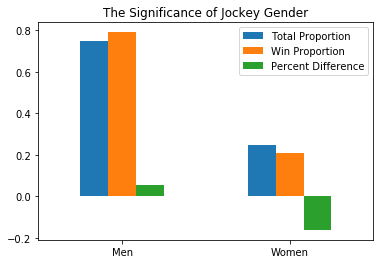

In [74]:
index8 = ['Men','Women']
df8 = pd.DataFrame({'Total Proportion': jockey_sex_pop,'Win Proportion': jockey_sex_win ,
                    'Percent Difference': jockey_sex_percent_difference}, index=index8)
ax = df8.plot.bar(rot=0, title='The Significance of Jockey Gender')

#### Using a 2-proportion z-test, I find that jockey gender is significant with a p-value of 2.3E-30
##### (There is currently a bug with the statsmodels library concerning compatibility with scipy, so I used a scientific calculator)

### Do blinkers make a difference?

In [75]:
blinkers_pop_cleaned = column_cleaner(df_cleaned, df_grouped, 'blinkers')
blinkers_pop_cleaned_win = cleaned_win_df(blinkers_pop_cleaned)
print('Rows in blinkers_pop_cleaned:',len(blinkers_pop_cleaned))
print('Rows in blinkers_pop_cleaned_win:',len(blinkers_pop_cleaned_win))

Rows in blinkers_pop_cleaned: 68830
Rows in blinkers_pop_cleaned_win: 6637


In [76]:
#General percentage of horse genders for races where multiple genders are represented  
blinkers_pop_cleaned.blinkers.value_counts(dropna=False,normalize=True).sort_values(ascending=False)

False   0.86
True    0.14
Name: blinkers, dtype: float64

In [77]:
blinkers_pop_cleaned_win.blinkers.value_counts(dropna=False,normalize=True).sort_values(ascending=False)

False   0.86
True    0.14
Name: blinkers, dtype: float64

#### Blinkers appear to make no difference.

### How many races before previous finishes become irrelevant?

#### The distribution after 1 start:

In [78]:
last_start_pop_cleaned = column_cleaner(df_cleaned, df_grouped, 'last_start1')
last_start_pop_cleaned_win = cleaned_win_df(last_start_pop_cleaned)

In [79]:
#The percent difference between the previous finish of the winner and all horses:
last_start_pop = last_start_pop_cleaned.last_start1.value_counts(normalize=True,
                                                                 dropna=False)
last_start_win = last_start_pop_cleaned_win.last_start1.value_counts(normalize=True,
                                                                     dropna=False)
last_start_percent_difference = (last_start_win - last_start_pop)/last_start_pop
last_start_percent_difference

1         -0.06
2         -0.10
3         -0.11
4         -0.21
5         -0.16
6         -0.27
7         -0.19
8         -0.18
9         -0.25
fell       0.20
scratch   -0.12
ten+      -0.28
Name: last_start1, dtype: float64

In [80]:
index9 = ['1','2','3','4','5','6','7','8','9','ten+','scratch','fell','none']
df9 = pd.DataFrame({'Total Proportion': last_start_pop,'Win Proportion': last_start_win,
                    'Percent Difference': last_start_percent_difference}, index=index9)

#### After 5 starts:

In [81]:
last_start_pop_cleaned = column_cleaner(df_cleaned, df_grouped, 'last_start5')
last_start_pop_cleaned_win = cleaned_win_df(last_start_pop_cleaned)

In [82]:
#Finding the percent difference between win and total
last_start_pop = last_start_pop_cleaned.last_start5.value_counts(normalize=True,
                                                                 dropna=False)
last_start_win = last_start_pop_cleaned_win.last_start5.value_counts(normalize=True,
                                                                     dropna=False)
last_start_percent_difference = (last_start_win - last_start_pop)/last_start_pop

In [83]:
index10 = ['1','2','3','4','5','6','7','8','9','ten+','scratch','fell','none']
df10 = pd.DataFrame({'Total Proportion': last_start_pop,'Win Proportion': last_start_win,
                    'Percent Difference': last_start_percent_difference}, index=index10)

#### After 10 starts:

In [84]:
last_start_pop_cleaned = column_cleaner(df_cleaned, df_grouped, 'last_start10')
last_start_pop_cleaned_win = cleaned_win_df(last_start_pop_cleaned)

In [85]:
#Finding the percent difference between win and total
last_start_pop = last_start_pop_cleaned.last_start10.value_counts(normalize=True,
                                                                 dropna=False)
last_start_win = last_start_pop_cleaned_win.last_start10.value_counts(normalize=True,
                                                                     dropna=False)
last_start_percent_difference = (last_start_win - last_start_pop)/last_start_pop

In [86]:
index11 = ['1','2','3','4','5','6','7','8','9','ten+','scratch','fell','none']
df11 = pd.DataFrame({'Total Proportion': last_start_pop,'Win Proportion': last_start_win,
                    'Percent Difference': last_start_percent_difference}, index=index11)

#### Graphing form data:

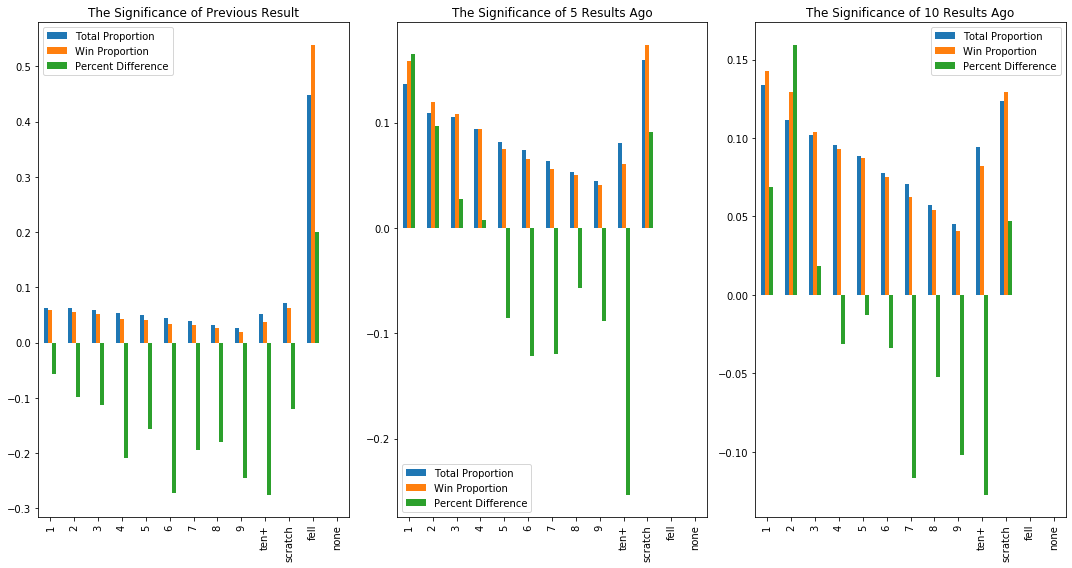

In [87]:
fig,ax1 = plt.subplots(1, 3)

df9.plot.bar(ax=ax1[0],figsize=(15, 8)).set_title('The Significance of Previous Result')
df10.plot.bar(ax=ax1[1],figsize=(15, 8)).set_title('The Significance of 5 Results Ago')
df11.plot.bar(ax=ax1[2],figsize=(15, 8)).set_title('The Significance of 10 Results Ago')

plt.tight_layout()

#### The larger win and total portions in the 5 and 10 results ago categories are likely because the horse is more of a veteran.

## How often would you win and what would be your expected return if you always bet on the favorite?

In [88]:
#Removing races where there is only one odds value
odds_cleaned = column_cleaner(df_cleaned, df_grouped, 'bf_odds')

In [89]:
#creates dataframe with a unique index
odds_cleaned.sort_index(level=['date','venue_name','race_number'],inplace=True)
odds_cleaned.reset_index(inplace=True)
odds_grouped = odds_cleaned.groupby(['date','venue_name','race_number','market_name'])

odds_cleaned.head()

,date,venue_name,race_number,market_name,position_again,bf_odds,condition,name,barrier,blinkers,emergency,handicap_weight,prize_money,sex,age,jockey_sex,days_since_last_run,overall_starts,overall_wins,overall_places,track_starts,track_wins,track_places,firm_starts,firm_wins,firm_places,good_starts,good_wins,good_places,slow_starts,slow_wins,slow_places,soft_starts,soft_wins,soft_places,heavy_starts,heavy_wins,heavy_places,distance_starts,distance_wins,distance_places,distance,overall_win_percent,overall_place_percent,track_win_percent,track_place_percent,distance_win_percent,distance_place_percent,condition_win_percent,condition_starts,condition_place_percent,last_start10,last_start9,last_start8,last_start7,last_start6,last_start5,last_start4,last_start3,last_start2,last_start1,prize_money_per_start,prize_money_per_start_z,handicap_weight_norm,handicap_weight_z,days_since_last_run_norm,days_since_last_run_z,overall_win_percent_norm,overall_win_percent_z,overall_place_percent_norm,overall_place_percent_z,distance_win_percent_norm,distance_win_percent_z,distance_place_percent_norm,distance_place_percent_z,condition_win_percent_norm,condition_win_percent_z,age_norm,age_z,condition_place_percent_norm,condition_place_percent_z,overall_starts_norm,overall_starts_z,distance_starts_norm,distance_starts_z,condition_starts_norm,condition_starts_z,track_starts_norm,track_starts_z
0,2016-06-27,Echuca,3,R3 1200m Mdn,1.00,2.88,HEAVY,CORONATION LANCE,3.00,False,False,58.50,2160.00,Gelding,3.00,Male,14.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1200,0.00,1.00,nan,nan,0.00,1.00,nan,0.00,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,fell,2160.00,-0.29,1.00,1.63,0.00,-0.64,0.00,nan,1.00,2.64,0.00,nan,1.00,nan,nan,nan,0.00,-0.99,nan,nan,0.00,-0.75,0.09,-0.59,0.00,-0.61,0.00,-0.41
1,2016-06-27,Echuca,3,R3 1200m Mdn,2.00,15.00,HEAVY,THUNDER GUN,10.00,False,False,58.50,21175.00,Gelding,5.00,Male,39.00,5.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,1.00,2.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1200,0.00,0.20,nan,nan,0.00,1.00,0.00,1.00,0.00,NaN,2,scratch,ten+,8,scratch,6,scratch,ten+,fell,4235.00,0.62,1.00,1.63,0.16,-0.21,0.00,nan,0.20,0.06,0.00,nan,1.00,nan,0.00,nan,0.67,0.57,0.00,nan,0.25,0.08,0.09,-0.59,0.33,0.51,0.00,-0.41
2,2016-06-27,Echuca,3,R3 1200m Mdn,3.00,95.00,HEAVY,JUST LEAVE,6.00,False,False,56.50,28855.00,Mare,6.00,Male,15.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,1.00,0.00,0.00,5.00,0.00,0.00,3.00,0.00,0.00,4.00,0.00,0.00,1200,0.00,0.00,nan,nan,0.00,0.00,0.00,3.00,0.00,scratch,9,7,5,7,7,4,8,6,fell,2885.50,0.02,0.00,-0.61,0.01,-0.63,0.00,nan,0.00,-0.59,0.00,nan,0.00,nan,0.00,nan,1.00,1.34,0.00,nan,0.56,1.11,0.36,0.43,1.00,2.76,0.00,-0.41
3,2016-06-27,Echuca,3,R3 1200m Mdn,nan,20.00,HEAVY,ONYA SKATES KATE,2.00,False,False,56.50,1475.00,Filly,3.00,Male,15.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1200,0.00,0.00,nan,nan,0.00,0.00,nan,0.00,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ten+,fell,1475.00,-0.60,0.00,-0.61,0.01,-0.63,0.00,nan,0.00,-0.59,0.00,nan,0.00,nan,nan,nan,0.00,-0.99,nan,nan,0.00,-0.75,0.09,-0.59,0.00,-0.61,0.00,-0.41
4,2016-06-27,Echuca,3,R3 1200m Mdn,nan,2.74,HEAVY,DISSEMINATE,7.00,False,False,56.50,1215.00,Filly,3.00,Male,173.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1200,0.00,0.00,nan,nan,0.00,0.00,nan,0.00,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,scratch,4,fell,1215.00,-0.71,0.00,-0.61,1.00,2.10,0.00,nan,0.00,-0.59,0.00,nan,0.00,nan,nan,nan,0.00,-0.99,nan,nan,0.00,-0.75,0.09,-0.59,0.00,-0.61,0.00,-0.41


In [90]:
#finds index of favorite for every race
favorite_indices = odds_grouped.bf_odds.idxmin()

#finds row for each favorite
favorite_cleaned = odds_cleaned.loc[favorite_indices]

#finds favorites that won
favorite_win = cleaned_win_df(favorite_cleaned)

favorite_pop_count = len(favorite_cleaned)
favorite_win_count = len(favorite_win)

#finds average win of favorite that won
average = favorite_win.bf_odds.mean()

print('Number of favorites:',favorite_pop_count)
print('Number of favorites that win:',favorite_win_count)
print('Average odds of favorite that wins:',average)

Number of favorites: 22129
Number of favorites that win: 7641
Average odds of favorite that wins: 2.96345897133883


### How often the favorite wins:

In [91]:
print('{0:.2f} %'.format(favorite_win_count/favorite_pop_count*100))

34.53 %


#### Similar to value found here:
https://betmix.com/how-often-does-the-favorite-win-a-horse-race/#:~:text=On%20average%20favorites%20win%20about,dirt%20races%20than%20turf%20races.


### The expected return if betting 1 dollar on favorite every race:

In [92]:
(average*favorite_win_count - favorite_pop_count)/favorite_pop_count

0.02326313886754941

## Predicting winnings with regression models:

In [93]:
# Creating a new target feature that approximates the winnings of the horses that place
def place_odds_estimator(win_odds):
    place_odds = .212465 * win_odds + 1.01712
    return round(place_odds,2)

In [94]:
conditions = [(df_cleaned['position_again'] == 1),
              (df_cleaned['position_again'] == 2) | (df_cleaned['position_again'] == 3)]

choices = [df_cleaned['bf_odds'], place_odds_estimator(df_cleaned['bf_odds'])]

df_cleaned['target'] = np.select(conditions, choices, default=0)

In [95]:
df_cleaned[['position_again','bf_odds','target']].head()

position_again  bf_odds  \
date       venue_name race_number market_name                             
2016-06-27 Echuca     3           R3 1200m Mdn            1.00     2.88   
                                  R3 1200m Mdn            2.00    15.00   
                                  R3 1200m Mdn            3.00    95.00   
                                  R3 1200m Mdn             nan    20.00   
                                  R3 1200m Mdn             nan     2.74   

                                                target  
date       venue_name race_number market_name           
2016-06-27 Echuca     3           R3 1200m Mdn    2.88  
                                  R3 1200m Mdn    4.20  
                                  R3 1200m Mdn   21.20  
                                  R3 1200m Mdn    0.00  
                                  R3 1200m Mdn    0.00

In [96]:
df_cleaned.drop('position_again',axis=1,inplace=True)

### Creating dummy variables:

In [97]:
df_cleaned.sort_index(level=['date','venue_name','race_number'],inplace=True)

In [98]:
df_cleaned['uniq_idx'] = range(len(df_cleaned))
df_cleaned.set_index('uniq_idx',append=True,inplace=True)

In [99]:
categorical_list = ['sex','jockey_sex','condition','barrier','blinkers','emergency']
for i in range(10):
    categorical_list.append('last_start'+str(i+1)) 

df_cleaned = pd.get_dummies(df_cleaned,columns=categorical_list,drop_first=True,dummy_na=True)

### Oversampling

In [100]:
zero_count = df_cleaned['target'][df_cleaned['target'] == 0].count()
non_zero_count = df_cleaned['target'][df_cleaned['target'] != 0].count()

print("Non-Winning/Placing:", zero_count)
print("Winning/Placing:", non_zero_count)

Non-Winning/Placing: 156121
Winning/Placing: 62796


#### Creating unique index and grouping data

In [101]:
non_zero_idx_list = df_cleaned['target'][df_cleaned['target'] != 0].index
idx_list = []

for i in range(zero_count - non_zero_count):
    idx_list.append(rand.choice(non_zero_idx_list))

In [102]:
df_cleaned_new = pd.concat([df_cleaned, df_cleaned.loc[idx_list]])
df_cleaned_new.shape

(312242, 216)

In [103]:
df_cleaned_new['uniq_idx1'] = range(len(df_cleaned_new))
df_cleaned_new.set_index('uniq_idx1',append=True,inplace=True)
df_cleaned_new.reset_index(level='uniq_idx',drop=True,inplace=True)

In [104]:
df_cleaned_new.head()

bf_odds  \
date       venue_name race_number market_name  uniq_idx1            
2016-06-27 Echuca     3           R3 1200m Mdn 0             2.88   
                                               1            15.00   
                                               2            95.00   
                                               3            20.00   
                                               4             2.74   

                                                                      name  \
date       venue_name race_number market_name  uniq_idx1                     
2016-06-27 Echuca     3           R3 1200m Mdn 0          CORONATION LANCE   
                                               1               THUNDER GUN   
                                               2                JUST LEAVE   
                                               3          ONYA SKATES KATE   
                                               4               DISSEMINATE   

                                                          handicap_weight  \
date       venue_name race_number market_name  uniq_idx1                    
2016-06-27 Echuca     3           R3 1200m Mdn 0                    58.50   
                                               1                    58.50   
                                               2                    56.50   
                                               3                    56.50   
                                               4                    56.50   

                                                          prize_money  age  \
date       venue_name race_number market_name  uniq_idx1                     
2016-06-27 Echuca     3           R3 1200m Mdn 0              2160.00 3.00   
                                               1             21175.00 5.00   
                                               2             28855.00 6.00   
                                               3              1475.00 3.00   
                                               4              1215.00 3.00   

                                                          days_since_last_run  \
date       venue_name race_number market_name  uniq_idx1                        
2016-06-27 Echuca     3           R3 1200m Mdn 0                        14.00   
                                               1                        39.00   
                                               2                        15.00   
                                               3                        15.00   
                                               4                       173.00   

                                                          overall_starts  \
date       venue_name race_number market_name  uniq_idx1                   
2016-06-27 Echuca     3           R3 1200m Mdn 0                    1.00   
                                               1                    5.00   
                                               2                   10.00   
                                               3                    1.00   
                                               4                    1.00   

                                                          overall_wins  \
date       venue_name race_number market_name  uniq_idx1                 
2016-06-27 Echuca     3           R3 1200m Mdn 0                  0.00   
                                               1                  0.00   
                                               2                  0.00   
                                               3                  0.00   
                                               4                  0.00   

                                                          overall_places  \
date       venue_name race_number market_name  uniq_idx1                   
2016-06-27 Echuca     3           R3 1200m Mdn 0                    1.00   
                                               1                    1.00   
                

In [105]:
zero_count_new = df_cleaned_new['target'][df_cleaned_new['target'] == 0].count()
non_zero_count_new = df_cleaned_new['target'][df_cleaned_new['target'] != 0].count()

print("Non-Winning/Placing:", zero_count_new)
print("Winning/Placing:", non_zero_count_new)

Non-Winning/Placing: 156121
Winning/Placing: 156121


### Imputing nans:

In [106]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from math import floor

In [107]:
df_grouped = df_cleaned_new.groupby(['date','venue_name','race_number','market_name'])

df_grouped_list = [df_grouped.get_group(x) for x in df_grouped.groups]
len_sgl = len(df_grouped_list)

In [108]:
y = df_cleaned_new['target'].reset_index(level=list(range(4)))
X = df_cleaned_new.drop(['target','name'],axis=1).reset_index(level=list(range(4)))

In [109]:
train = df_grouped_list[:floor(.1*len_sgl)]
test = df_grouped_list[floor(.1*len_sgl):]

train_indices = [int(idx[-1]) for group in train for idx in group.index]
test_indices = [int(idx[-1]) for group in test for idx in group.index]

X_train,X_test,y_train,y_test = X.loc[train_indices],X.loc[test_indices],y.loc[train_indices],y.loc[test_indices]

In [110]:
X_train.set_index(['date','venue_name','race_number','market_name'], inplace=True, append=True)
X_test.set_index(['date','venue_name','race_number','market_name'], inplace=True, append=True)
y_train.set_index(['date','venue_name','race_number','market_name'], inplace=True, append=True)
y_test.set_index(['date','venue_name','race_number','market_name'], inplace=True, append=True)

In [111]:
imp_mean = IterativeImputer()
imp_mean.fit(X_train,y_train)
transformed_X = imp_mean.transform(X_test)

# Transformaing np.array output back into pandas dataframe
transformed_X = pd.DataFrame(data=transformed_X,index=y_test.index,columns=X_test.columns)

In [112]:
transformed_X.isna().sum().sum() #Total null values after transformation

0

In [113]:
transformed_X_grouped = transformed_X.groupby(['date','venue_name','race_number','market_name'])
transformed_X_grouped_list = [transformed_X_grouped.get_group(x) for x in transformed_X_grouped.groups]

In [114]:
# drop_columns = transformed_X.max()[transformed_X.max() > 1.01].index
# transformed_X.drop(drop_columns,axis=1,inplace=True)

transformed_X.reset_index(level=list(range(1,5)),drop=True,inplace=True)
y_test.reset_index(level=list(range(1,5)),drop=True,inplace=True)

### Splitting the grouped data:

In [115]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

#for function below
from time import time
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [116]:
clf_ridge = Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False, random_state=0,
                  solver='auto', tol=0.001)

In [117]:
params = {'bootstrap': [True, False],
         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


clf_rfr = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                                min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=5,
                                min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None, oob_score=False, random_state=0,
                                verbose=0, warm_start=False)

In [118]:
def scoring_func(target,pred):
    bet_list_target = []
    bet_list_pred = []
    
    for a,b in list(zip(target,pred)):
        if (a - 1 > 0) and (b - 1 > 0):
            bet_list_target.append(a)
            bet_list_pred.append(b)
        elif b - 1 > 0:
            bet_list_target.append(0)
            bet_list_pred.append(b)
        else:
            bet_list_target.append(0)
            bet_list_pred.append(0)
        
    return np.mean(mean_absolute_error(bet_list_target,bet_list_pred))
    
scorer = make_scorer(scoring_func, greater_is_better=False)

In [119]:
grid_rfr = RandomizedSearchCV(estimator=clf_rfr, param_distributions=params,
                              #scoring=scoring_func,
                              verbose=2, n_jobs=-1)

#### A function to split data and fit, predict, and score models:

In [120]:
def grouped_time_series_split(i, sorted_grouped_list, folds):
    len_sgl = len(sorted_grouped_list)
    
    train = sorted_grouped_list[:floor((i+1)/(folds+2)*len_sgl)]
    val = sorted_grouped_list[floor((i+1)/(folds+2)*len_sgl):floor((i+2)/(folds+2)*len_sgl)]
    test = sorted_grouped_list[floor((i+2)/(folds+2)*len_sgl):floor((i+3)/(folds+2)*len_sgl)]
    
    train_index = [int(idx[0]) for group in train for idx in group.index]
    val_index = [int(idx[0]) for group in val for idx in group.index]
    test_index = [int(idx[0]) for group in test for idx in group.index]
    
    print()
    print(f"Fold {i+1} lengths (number of horses):")
    print(f"Train:     {len(train_index)}")
    print(f"Validation:{len(val_index)}")
    print(f"Test:      {len(test_index)}")
    print()
    
    return train_index, val_index, test_index

def metrics_function(target,pred,name):
    bet_list_target = []
    bet_list_pred = []
    
    for a,b in list(zip(target,pred)): 
        if (a - 1 > 0) and (b - 1 > 0):
            bet_list_target.append(a)
            bet_list_pred.append(b)
        elif b - 1 > 0:
            bet_list_target.append(0)
            bet_list_pred.append(b)
        else:
            bet_list_target.append(0)
            bet_list_pred.append(0)
    
    return (mean_absolute_error(bet_list_target,bet_list_pred),
            r2_score(bet_list_target,bet_list_pred))
            
def time_series_train_model(model,X_all,y_all,data_folds_num,sorted_grouped_list):
    start=time()
        
    len_sgl = len(sorted_grouped_list)
        
    MAE_list_train=[]
    MAE_list_val=[]
    MAE_list_test=[]
    R2_list_train=[]
    R2_list_val=[]
    R2_list_test=[]
    
    true_values_val = []
    predict_values_val =[]
    
    true_values_test = []
    predict_values_test =[]
    
    
    for i in range(data_folds_num):
        train_index,val_index,test_index = grouped_time_series_split(i,sorted_grouped_list,data_folds_num)
        
        X_train = X_all.loc[train_index].values
        y_train = y_all.loc[train_index].values

        X_val = X_all.loc[val_index].values
        y_val = y_all.loc[val_index].values
        
        X_test = X_all.loc[test_index].values
        y_test = y_all.loc[test_index].values
        
        model.fit(X_train,y_train)
        
        y_pred1 = model.predict(X_train)
        y_pred2 = model.predict(X_val)
        y_pred3 = model.predict(X_test)

        train_MAE,train_R2=metrics_function(y_train,y_pred1,"train")
        val_MAE,val_R2=metrics_function(y_val,y_pred2,"val")
        test_MAE,test_R2=metrics_function(y_test,y_pred3,"test")
        
        MAE_list_train.append(train_MAE)
        MAE_list_val.append(val_MAE)
        MAE_list_test.append(test_MAE)
        R2_list_train.append(train_R2)
        R2_list_val.append(val_R2)
        R2_list_test.append(test_R2)
        
        true_values_val = true_values_val + list(zip(val_index,y_val))
        predict_values_val = predict_values_val + list(zip(val_index,y_pred2))
        
        true_values_test = true_values_test + list(zip(test_index,y_test))
        predict_values_test = predict_values_test + list(zip(test_index,y_pred3))
        
    print()
    print(f"Train MAE: {np.mean(MAE_list_train)}")
    print(f"Val MAE: {np.mean(MAE_list_val)}")
    print(f"Test MAE: {np.mean(MAE_list_test)}")
    print()
    print(f"Train R2: {np.mean(R2_list_train)}")
    print(f"Val R2: {np.mean(R2_list_val)}")
    print(f"Test R2: {np.mean(R2_list_test)}") 
    print()
    print(f"Data Folds Num: {data_folds_num}")
    print(f"Time: {time()-start}")
    print()
    
    for true_values,predict_values, name in ((true_values_val,predict_values_val,"Val"),
                                               (true_values_test,predict_values_test,"Test")):
    
        total_picks = 0
        correct_picks = []

        for ((a,b),(c,d)) in list(zip(true_values,predict_values)):
            if (b - 1 > 0) and (d - 1 > 0):
                correct_picks.append(b)
            if (d - 1 > 0):
                total_picks += 1

        win_odds_list = correct_picks

        average_win = np.mean(win_odds_list)
        
        print(name)
        print("Total Horses:",len(true_values))
        print("Total Picks:",total_picks)
        print("Percent of Horses Picked:",total_picks/len(true_values)*100)
        print("Correct Picks:",len(correct_picks))
        print("Precision:", len(correct_picks)/total_picks*100)
        print("Average Win Odds:",average_win)
        print("Total Return:",average_win*len(correct_picks)-total_picks)
        print("Average Expected Return:",(average_win*len(correct_picks)-total_picks)/total_picks)
        print()

    return model

### Random Forest

In [121]:
model = time_series_train_model(model=clf_ridge, 
                                X_all=transformed_X, 
                                y_all=y_test, 
                                data_folds_num=1, 
                                sorted_grouped_list=transformed_X_grouped_list)


Fold 1 lengths (number of horses):
Train:     95503
Validation:90117
Test:      94384


Train MAE: 3.1214601314756645
Val MAE: 3.1481821597817166
Test MAE: 3.3563805225284664

Train R2: 0.027769752440331197
Val R2: -0.0028236981093341385
Test R2: -0.005114549843605376

Data Folds Num: 1
Time: 15.653370141983032

Val
Total Horses: 90117
Total Picks: 86376
Percent of Horses Picked: 95.84872998435368
Correct Picks: 43847
Precision: 50.76294341020654
Average Win Odds: 5.7342924259356405
Total Return: 165055.52000000002
Average Expected Return: 1.9108956191534687

Test
Total Horses: 94384
Total Picks: 89719
Percent of Horses Picked: 95.05742498728597
Correct Picks: 44404
Precision: 49.492303748369906
Average Win Odds: 6.183339338798307
Total Return: 184846.0
Average Expected Return: 2.0602770873505056



In [122]:
model = time_series_train_model(model=clf_rfr, 
                                X_all=transformed_X, 
                                y_all=y_test, 
                                data_folds_num=1, 
                                sorted_grouped_list=transformed_X_grouped_list)


Fold 1 lengths (number of horses):
Train:     95503
Validation:90117
Test:      94384


Train MAE: 0.41212847920006773
Val MAE: 2.3566713748440256
Test MAE: 2.5354635553772304

Train R2: 0.9406782463738158
Val R2: -0.026756601969436078
Test R2: -0.0051899668321180314

Data Folds Num: 1
Time: 154.72486877441406

Val
Total Horses: 90117
Total Picks: 74165
Percent of Horses Picked: 82.29856741791227
Correct Picks: 40456
Precision: 54.54864154250657
Average Win Odds: 5.205363604904093
Total Return: 136423.19
Average Expected Return: 1.8394551338232321

Test
Total Horses: 94384
Total Picks: 80284
Percent of Horses Picked: 85.06102729276148
Correct Picks: 42179
Precision: 52.53724278810223
Average Win Odds: 5.6727255269209795
Total Return: 158985.88999999998
Average Expected Return: 1.9802935827811268

